# Collecting the Data:

In [43]:
import pandas_datareader as pdr

# We will predict Stock Price of Google
df = pdr.get_data_tiingo('GOOG', api_key='my_api_key')
df.head()

close     high  ...  divCash  splitFactor
symbol date                                        ...                      
GOOG   2016-01-06 00:00:00+00:00  743.62  747.180  ...      0.0          1.0
       2016-01-07 00:00:00+00:00  726.39  738.500  ...      0.0          1.0
       2016-01-08 00:00:00+00:00  714.47  733.230  ...      0.0          1.0
       2016-01-11 00:00:00+00:00  716.03  718.855  ...      0.0          1.0
       2016-01-12 00:00:00+00:00  726.07  728.750  ...      0.0          1.0

[5 rows x 12 columns]

In [44]:
df.to_csv('GOOG.csv') # getting the csv file

# We will make predictions for the 'Close' column:

In [45]:
import pandas as pd
df1 = df.reset_index()['close']
df1

0        743.62
1        726.39
2        714.47
3        716.03
4        726.07
         ...   
1252    1738.85
1253    1776.09
1254    1758.72
1255    1739.52
1256    1751.88
Name: close, Length: 1257, dtype: float64

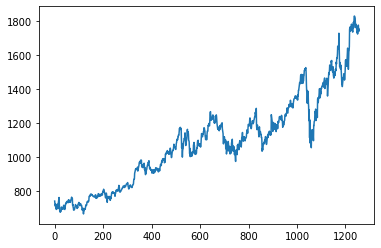

In [46]:
# plotting the df1:
import matplotlib.pyplot as plt
plt.plot(df1)

## Scaling the df1 data:

In [47]:
# LSTMs are sensitive to the scale of the data, so we will scale the data using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# scaler instance
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))
df1 # values scaled btw 0 and 1

array([[0.06498064],
       [0.05012374],
       [0.03984548],
       ...,
       [0.94027058],
       [0.923715  ],
       [0.93437266]])

# Splitting the df1 into training and testing dset:

In [48]:
training_size = int(len(df1)*0.65) # 65 % of df1
testing_size = len(df1)-training_size
train_dset, test_dset = df1[0:training_size,:], df1[training_size:len(df1),:]

print(training_size, testing_size)
print(train_dset, test_dset)

817 440
[[0.06498064]
 [0.05012374]
 [0.03984548]
 [0.04119062]
 [0.04984781]
 [0.02785131]
 [0.04006105]
 [0.02258284]
 [0.0289119 ]
 [0.02603192]
 [0.0330508 ]
 [0.04914075]
 [0.03743113]
 [0.03861244]
 [0.02735982]
 [0.05406431]
 [0.06440292]
 [0.07220646]
 [0.08311417]
 [0.05060661]
 [0.03427522]
 [0.01320135]
 [0.01248566]
 [0.00849336]
 [0.0136756 ]
 [0.0128047 ]
 [0.01219249]
 [0.01960801]
 [0.0346115 ]
 [0.02508342]
 [0.0281531 ]
 [0.0329387 ]
 [0.02379002]
 [0.02698904]
 [0.03232649]
 [0.03174015]
 [0.02544558]
 [0.04358773]
 [0.04362222]
 [0.03807783]
 [0.03675856]
 [0.02319505]
 [0.02216895]
 [0.03188673]
 [0.03842274]
 [0.05049451]
 [0.05365904]
 [0.05179654]
 [0.05848775]
 [0.05994499]
 [0.05978978]
 [0.06366137]
 [0.06250593]
 [0.06018642]
 [0.05780656]
 [0.05628034]
 [0.06597225]
 [0.07093893]
 [0.06612746]
 [0.07040432]
 [0.06642063]
 [0.05996223]
 [0.06676554]
 [0.06210066]
 [0.0611263 ]
 [0.05849637]
 [0.06452364]
 [0.07196503]
 [0.07324119]
 [0.07824235]
 [0.08480422

# Create Independent/dependent features (X_train,y_train,X_test,y_test):


In [49]:
def create_dset(dset, timeStep=1):
  #convert array_values into matrix of features:
  dataX, dataY = [], []
  for i in range(len(dset)-timeStep-1):
    dataX.append(dset[i:i+timeStep,0]) # for i=0, =>0,1,2,3...99
    dataY.append(dset[i+timeStep,0]) # for i=0, =>100

  return np.array(dataX), np.array(dataY)



In [50]:
#  reshape into X=t,t+1,t+2,...t+99 and y=t+100
timeStep = 100

# training_dset
X_train, y_train = create_dset(train_dset, timeStep)
X_test, y_test = create_dset(test_dset, timeStep)

In [51]:
print('X_train: ',X_train)
print('y_train: ',y_train)
print(X_train.shape, y_train.shape)

X_train:  [[0.06498064 0.05012374 0.03984548 ... 0.04915799 0.04816638 0.05553017]
 [0.05012374 0.03984548 0.04119062 ... 0.04816638 0.05553017 0.05816871]
 [0.03984548 0.04119062 0.04984781 ... 0.05553017 0.05816871 0.05681495]
 ...
 [0.3358799  0.32061773 0.33417261 ... 0.43523924 0.43133316 0.43548929]
 [0.32061773 0.33417261 0.3665767  ... 0.43133316 0.43548929 0.45370043]
 [0.33417261 0.3665767  0.35710036 ... 0.43548929 0.45370043 0.45892578]]
y_train:  [0.05816871 0.05681495 0.05358144 0.04663154 0.041639   0.04172523
 0.05175343 0.05201211 0.04410509 0.04319971 0.04312211 0.04368258
 0.03630155 0.02022885 0.02194476 0.02386762 0.02517827 0.02898088
 0.0060014  0.         0.01015754 0.01366697 0.02055651 0.02668725
 0.02261733 0.02544558 0.02336751 0.03222302 0.04038009 0.04516569
 0.04200978 0.04543299 0.04448449 0.05649591 0.05923793 0.06288533
 0.06067792 0.06422184 0.0616609  0.06049684 0.06338544 0.06695524
 0.08668397 0.09021065 0.08864994 0.09046933 0.08911557 0.09826425


In [52]:
print('X_test: ',X_test)
print('y_test: ',y_test)
print(X_test.shape, y_test.shape)


X_test:  [[0.4646685  0.46181439 0.45613203 ... 0.41650212 0.43167806 0.43077268]
 [0.46181439 0.45613203 0.46036577 ... 0.43167806 0.43077268 0.4335147 ]
 [0.45613203 0.46036577 0.46248696 ... 0.43077268 0.4335147  0.45233804]
 ...
 [0.69442888 0.7172704  0.71243307 ... 0.90990144 0.9175584  0.92313728]
 [0.7172704  0.71243307 0.71382132 ... 0.9175584  0.92313728 0.9552482 ]
 [0.71243307 0.71382132 0.70021471 ... 0.92313728 0.9552482  0.94027058]]
y_test:  [0.4335147  0.45233804 0.44824226 0.43124693 0.44247368 0.4683159
 0.46275426 0.46230588 0.46367689 0.47589525 0.48803601 0.49261466
 0.48549231 0.48363843 0.48644943 0.49188173 0.484311   0.48784631
 0.47467945 0.49861606 0.49419261 0.48013762 0.4748864  0.46290085
 0.43835203 0.44800945 0.4662637  0.4651255  0.4491304  0.46049512
 0.46597915 0.47182534 0.47328257 0.49558949 0.49613272 0.50426392
 0.49772792 0.49829702 0.49540841 0.50948928 0.5110931  0.5146629
 0.53610754 0.5124986  0.51135178 0.5103343  0.52208704 0.53728885
 0.5

# Create a stacked LSTM Deep Learning Model:

In [53]:
# reshape the X_train,X_test into [samples, timesteps, features] as required in LSTM:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)


In [54]:
# create model:

# importing the libraries:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(100,1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))

# model compiling:
model.compile(
    loss='mean_squared_error',
    optimizer='adam'
)

In [55]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
lstm_4 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_5 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [56]:
model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=64,
    validation_data=(X_test, y_test),
    verbose=1
    )

Epoch 1/100
12/12 [==============================] - 9s 279ms/step - loss: 0.0511 - val_loss: 0.0278
Epoch 2/100
12/12 [==============================] - 2s 197ms/step - loss: 0.0044 - val_loss: 0.0114
Epoch 3/100
12/12 [==============================] - 2s 193ms/step - loss: 0.0026 - val_loss: 0.0159
Epoch 4/100
12/12 [==============================] - 2s 198ms/step - loss: 0.0012 - val_loss: 0.0080
Epoch 5/100
12/12 [==============================] - 2s 199ms/step - loss: 0.0010 - val_loss: 0.0061
Epoch 6/100
12/12 [==============================] - 2s 196ms/step - loss: 9.4564e-04 - val_loss: 0.0069
Epoch 7/100
12/12 [==============================] - 2s 196ms/step - loss: 9.6239e-04 - val_loss: 0.0079
Epoch 8/100
12/12 [==============================] - 2s 193ms/step - loss: 9.0046e-04 - val_loss: 0.0073
Epoch 9/100
12/12 [==============================] - 2s 192ms/step - loss: 9.1273e-04 - val_loss: 0.0068
Epoch 10/100
12/12 [==============================] - 2s 194ms/step - loss:

# Making Predictions:


In [63]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# convert to original form:
y_pred_train = scaler.inverse_transform(y_pred_train)
y_pred_test = scaler.inverse_transform(y_pred_test)
# y_pred_test

# Evaluating the model:

In [64]:
import math
from sklearn.metrics import mean_squared_error
print("RMSE of Training dset",math.sqrt(mean_squared_error(y_train, y_pred_train)))

print("RMSE of Testing dset",math.sqrt(mean_squared_error(y_test, y_pred_test)))


RMSE of Training dset 978.4745094109913
RMSE of Testing dset 1370.6235090104549


# Plotting the model's predictions on train_dset and test_dset in comparison to original_dset:

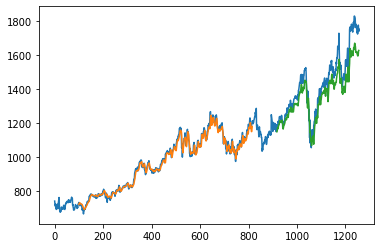

In [67]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(y_pred_train)+look_back, :] = y_pred_train
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(y_pred_train)+(look_back*2)+1:len(df1)-1, :] = y_pred_test
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

# Making Predictions for the next 30 days:


In [68]:
len(test_dset)

440

In [78]:
x_input=test_dset[340:].reshape(1,-1)
x_input.shape

(1, 100)

In [79]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
temp_input

[0.7002147051468876,
 0.7228923973683529,
 0.7330930475196814,
 0.7238495166978521,
 0.73268778077656,
 0.7677131746182301,
 0.7581678494132255,
 0.787674717391117,
 0.7865278987350505,
 0.7932363567382065,
 0.8104989954558389,
 0.8485768239159116,
 0.8330128564407232,
 0.8417045346761748,
 0.8328835159907911,
 0.855759530235486,
 0.9140230915816613,
 0.8394885016340009,
 0.795685202590258,
 0.7451130866667243,
 0.7662990523656369,
 0.7447940468902244,
 0.7350503996619903,
 0.7338087313426401,
 0.7529166271459736,
 0.7352056082019093,
 0.713329826770024,
 0.6826847628327283,
 0.657825528355738,
 0.6874013779069267,
 0.6440723271796022,
 0.6553508144136998,
 0.6697248497495106,
 0.6865908444206842,
 0.6907383615151802,
 0.6909711743250583,
 0.7086390797858121,
 0.6813309994567701,
 0.7051296422443155,
 0.6770368965190176,
 0.6829434437325929,
 0.7050520379743562,
 0.7303079164978056,
 0.7768101195968028,
 0.7789916618523277,
 0.7758874910539523,
 0.7681701775413244,
 0.7801384805083943,

In [80]:
# demonstrate prediction for next 30 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

print(lst_output)

[0.80757064]
101
1 day input [0.7228924  0.73309305 0.72384952 0.73268778 0.76771317 0.75816785
 0.78767472 0.7865279  0.79323636 0.810499   0.84857682 0.83301286
 0.84170453 0.83288352 0.85575953 0.91402309 0.8394885  0.7956852
 0.74511309 0.76629905 0.74479405 0.7350504  0.73380873 0.75291663
 0.73520561 0.71332983 0.68268476 0.65782553 0.68740138 0.64407233
 0.65535081 0.66972485 0.68659084 0.69073836 0.69097117 0.70863908
 0.681331   0.70512964 0.6770369  0.68294344 0.70505204 0.73030792
 0.77681012 0.77899166 0.77588749 0.76817018 0.78013848 0.74702733
 0.76541091 0.79764255 0.81662973 0.8387642  0.79517646 0.80708441
 0.73151509 0.77516318 0.82152742 0.82585602 0.8467057  0.93200141
 0.94428013 0.94288326 0.94396109 0.92446518 0.93508834 0.93261363
 0.95605012 0.95980961 0.95012632 0.92997508 0.94475438 0.92601726
 0.91969683 0.94903124 0.95123003 0.96999302 0.94201236 0.97422676
 0.99996551 0.99894803 1.         0.99266209 0.99186017 0.96218085
 0.95459288 0.9601459  0.94142602 

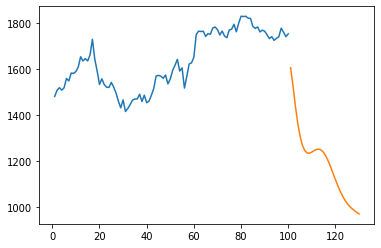

In [89]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

# len(df1)

plt.plot(day_new,scaler.inverse_transform(df1[1157:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

# Orange curve is the prediction for the next 30 days;

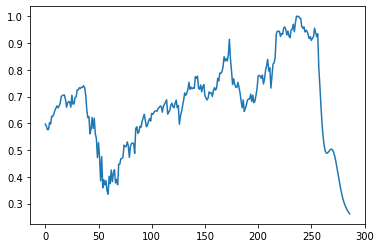

In [88]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1000:])